In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv('iris.data', names = ['sepal length','sepal width','petal length','petal width','type'])

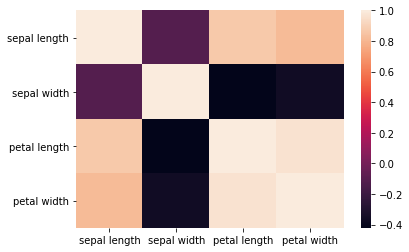

In [19]:
sns.heatmap(data.corr())

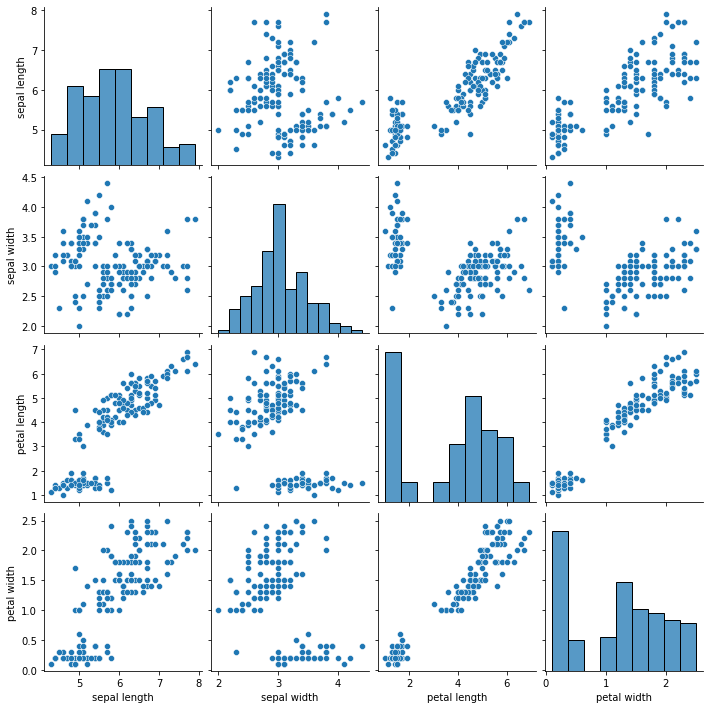

In [21]:
sns.pairplot(data)

In [22]:
data['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
data['objetivo'] = data['type'].apply(lambda x:1 if x=='Iris-setosa' else 0)

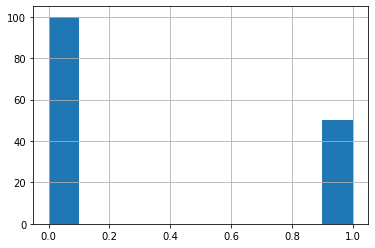

In [25]:
data['objetivo'].hist()

Epoch 1, bias: 0.0 , w1: -0.9500000000000002, w2: -1.6500000000000001, error: 0


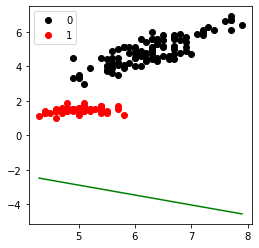

Epoch 2, bias: 0.0 , w1: -1.9000000000000004, w2: -3.3000000000000003, error: 0


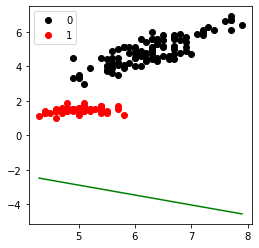

Epoch 3, bias: 0.5 , w1: -0.40000000000000036, w2: -4.250000000000001, error: 0


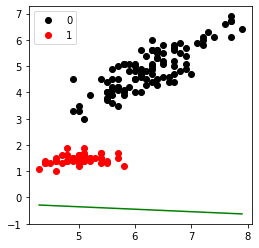

Epoch 4, bias: 0.5 , w1: -0.40000000000000036, w2: -5.050000000000001, error: 0


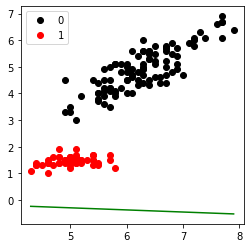

Epoch 5, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


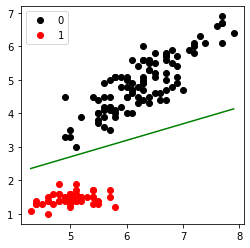

Epoch 6, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


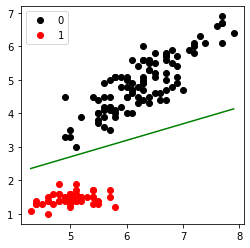

Epoch 7, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


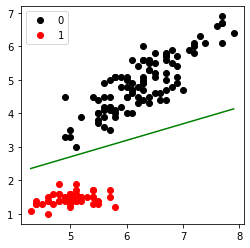

Epoch 8, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


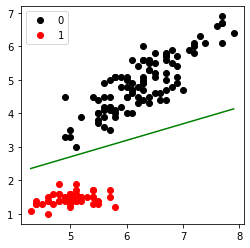

Epoch 9, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


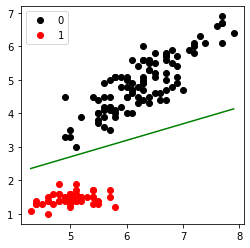

Epoch 10, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


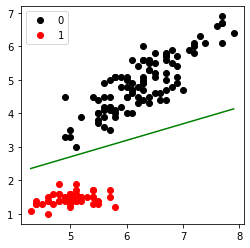

Epoch 11, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


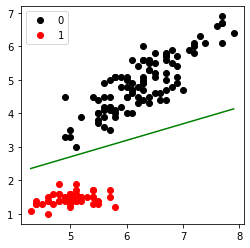

Epoch 12, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


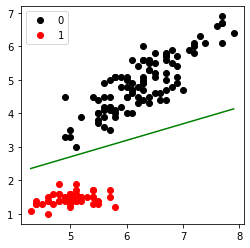

Epoch 13, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


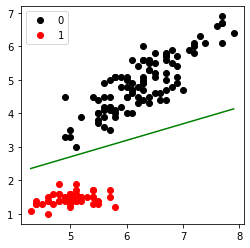

Epoch 14, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


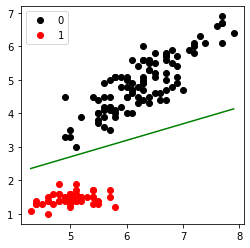

Epoch 15, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


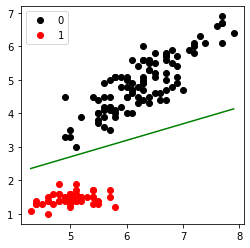

Epoch 16, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


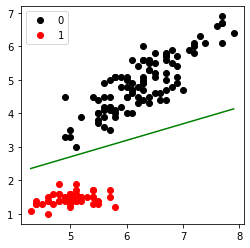

Epoch 17, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


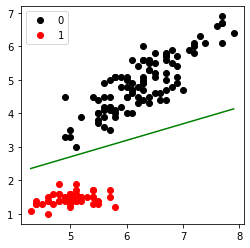

Epoch 18, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


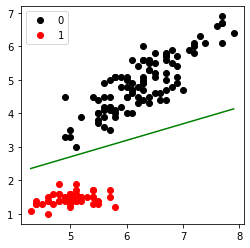

Epoch 19, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


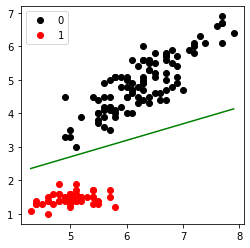

Epoch 20, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


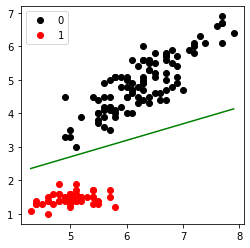

Epoch 21, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


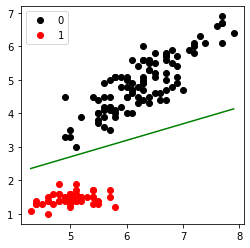

Epoch 22, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


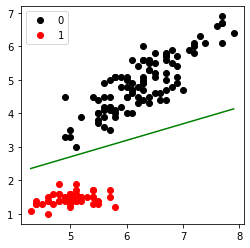

Epoch 23, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


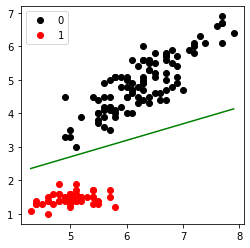

Epoch 24, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


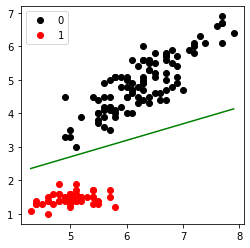

Epoch 25, bias: 1.0 , w1: 2.1499999999999995, w2: -4.3500000000000005, error: 0


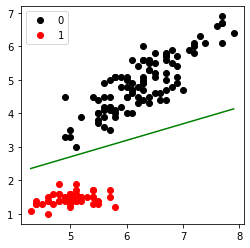

In [36]:
##Ejercicio 1
x1 = data['sepal length']
x2 = data['petal length']
y = data['objetivo']
class_0 = y == 0 # Esto es una máscara
class_1 = y == 1
def f(x):
    return -(b + w_1*x)/w_2 
## Funcion de activacion hiperbolica
def hip(z):
    return (2/(1+np.exp(-2*z)))-1
b = 0
w_1 = 0
w_2 = 0 
n_epochs = 25
eta = 0.5
for epoch in range(n_epochs):
    for i,j,k in zip(x1,x2,y):
        z = w_1*i+w_2*j+b
        
        sig_z = hip(z)
        
        if sig_z >= 0.7:
            out = 1
        else:
            out = 0 
        
        error = k-out 
        b = b+eta*error
        w_1 += eta*error*i
        w_2 += eta*error*j
    print('Epoch {}, bias: {} , w1: {}, w2: {}, error: {}'.format(epoch+1,b,w_1,w_2,error))
    fig = plt.figure(figsize=(4,4))
    plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
    plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')
    plt.plot(np.sort(x1),f(np.sort(x1)),'-', c='green')
    plt.legend()
    plt.show()

In [46]:
## Ejercicio 2 - Red con 2 capas
X = data.drop(columns=['objetivo','type'])
def clasificar(x):
    if x == 'Iris-setosa':
        return 1
    elif x == 'Iris-versicolor':
        return 2
    else: 
        return 3
y = data['type'].apply(clasificar)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
params = {'activation':['relu','tanh','logistic','identity'],'solver':['lbfgs','sgd','adam'],'max_iter':[15,50,100,200]}
gs = GridSearchCV(MLPClassifier(hidden_layer_sizes=(3,4)),param_grid = params, cv = 3, verbose = 1)
gs_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimi

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERA

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer

In [47]:
y_pred = gs_res.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred,y_test), confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.94      0.97        16
           3       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


In [50]:
### Ejercicio con 3 capas 
X = data.drop(columns=['objetivo','type'])
def clasificar(x):
    if x == 'Iris-setosa':
        return 1
    elif x == 'Iris-versicolor':
        return 2
    else: 
        return 3
y = data['type'].apply(clasificar)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
params = {'activation':['relu','tanh','logistic','identity'],'solver':['lbfgs','sgd','adam'],'max_iter':[15,50,100,200]}
gs = GridSearchCV(MLPClassifier(hidden_layer_sizes=(3,4,3)),param_grid = params, cv = 3, verbose = 1)
gs_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Ma

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

In [51]:
y_pred = gs_res.predict(X_test)
print(classification_report(y_pred,y_test), confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.97        14
           3       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 [[19  0  0]
 [ 0 14  0]
 [ 0  1 16]]
